In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit import transpile
import random
%matplotlib inline

In [2]:
# Let's define a function that creates a random binary number of length n. This number is given by the computer itself.

def secretNumber(n):
    l = ["0","1"]
    binary_list = []
    for index in range(n):
        number = random.choice(l)
        binary_list.append(number)
    binary_string = "".join(binary_list)
    
    return binary_string

In [3]:
# Store the result of the function in the variable secretNumber
secretNumber = secretNumber(10)

In [4]:
circuit = QuantumCircuit(len(secretNumber) + 1,len(secretNumber))

In [5]:
circuit.h(range(len(secretNumber)))
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))

circuit.barrier()

for index, one in enumerate(reversed(secretNumber)):
    print(f"index {index} is {one}")
    if one == "1":
        circuit.cx(index, len(secretNumber))

circuit.barrier()

circuit.h(range(len(secretNumber)))

circuit.barrier()

circuit.measure(range(len(secretNumber)), range(len(secretNumber)))

index 0 is 1
index 1 is 1
index 2 is 0
index 3 is 1
index 4 is 0
index 5 is 0
index 6 is 0
index 7 is 1
index 8 is 1
index 9 is 0


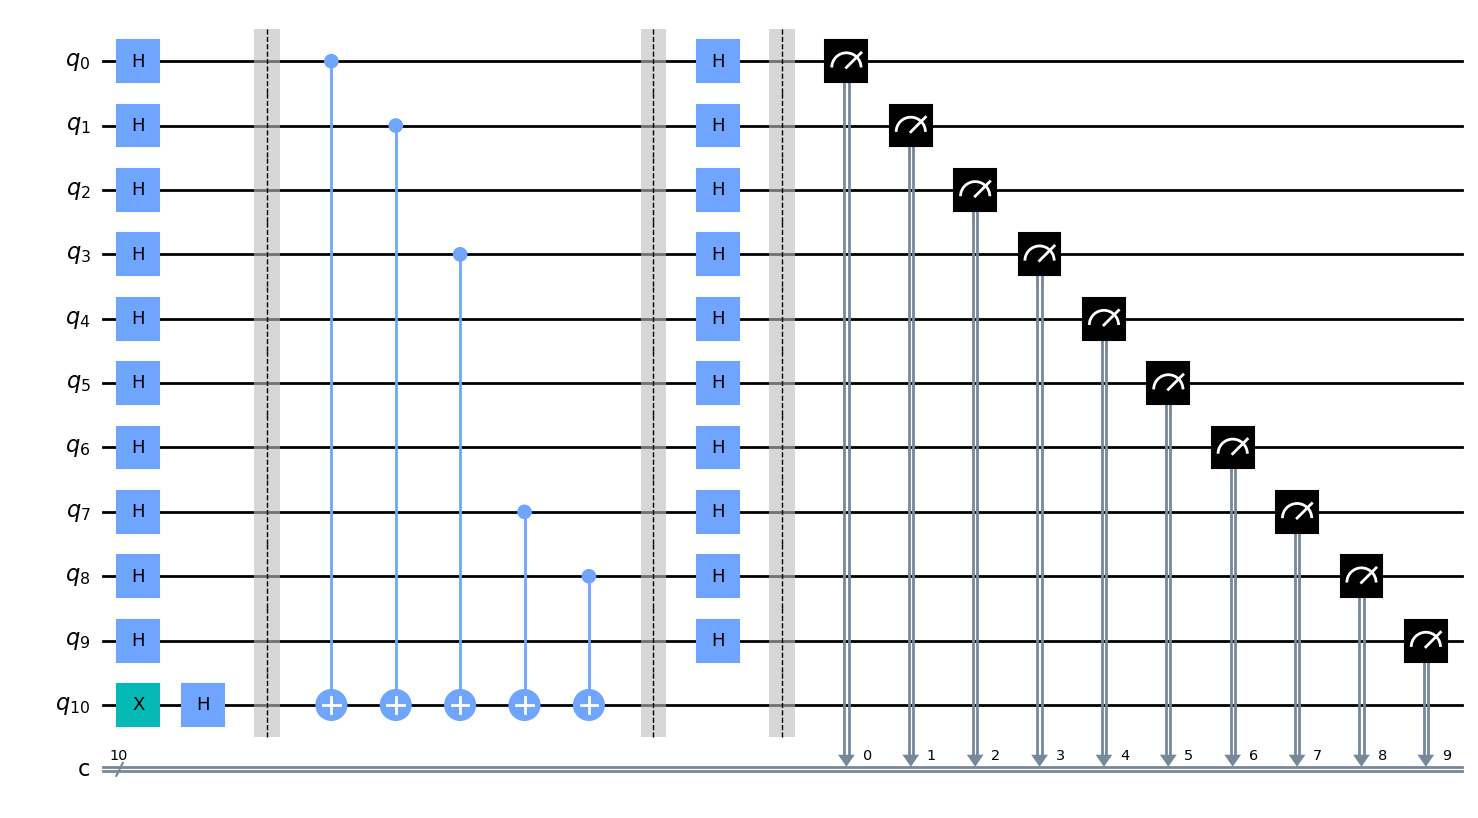

In [6]:
circuit.draw(output = "mpl")

In [7]:
# Choose the Aer simulator backend
backend = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the chosen backend
transpiled_circuit = transpile(circuit, backend)

# Execute the circuit on the chosen backend
job = backend.run(transpiled_circuit)

# Get the result from the job
result = job.result()

# Get the counts to obtain the result
counts = result.get_counts(circuit)

# Print the obtained secret number and the number of counts needed by the simulator, to obtain the result.
print(counts)

# Print the secretNumber as defined in the function secretNumber
print("The Secret Number is ", secretNumber)

{'0110001011': 1024}
The Secret Number is  0110001011
